### Start with clean Data Folder Structure setup

In [2]:
import os
import shutil
import hashlib

# Pfade
source_dir = "data/TRAIN"
target_dir = "TRAIN_CLEAN"
os.makedirs(target_dir, exist_ok=True)

# Alle WAV-Dateien finden
for root, _, files in os.walk(source_dir):
    for file in files:
        if file.lower().endswith(".wav"):
            wav_path = os.path.join(root, file)
            phn_path = wav_path.rsplit(".", 1)[0] + ".PHN"

            if not os.path.exists(phn_path):
                print(f"⚠️  Keine passende PHN-Datei für: {wav_path}")
                continue

            # Eindeutigen Hash aus Pfad erzeugen
            unique_id = hashlib.sha1(wav_path.encode()).hexdigest()[:8]

            # Zielpfade
            new_wav = os.path.join(target_dir, f"{unique_id}.wav")
            new_phn = os.path.join(target_dir, f"{unique_id}.PHN")

            # Dateien kopieren
            shutil.copyfile(wav_path, new_wav)
            shutil.copyfile(phn_path, new_phn)

            print(f"✅ Kopiert: {new_wav}, {new_phn}")


✅ Kopiert: TRAIN_CLEAN\a93bf5c2.wav, TRAIN_CLEAN\a93bf5c2.PHN
⚠️  Keine passende PHN-Datei für: data/TRAIN\DR1\FCJF0\SA1.WAV.wav
✅ Kopiert: TRAIN_CLEAN\b3b26777.wav, TRAIN_CLEAN\b3b26777.PHN
⚠️  Keine passende PHN-Datei für: data/TRAIN\DR1\FCJF0\SA2.WAV.wav
✅ Kopiert: TRAIN_CLEAN\0470ab78.wav, TRAIN_CLEAN\0470ab78.PHN
⚠️  Keine passende PHN-Datei für: data/TRAIN\DR1\FCJF0\SI1027.WAV.wav
✅ Kopiert: TRAIN_CLEAN\268dcc44.wav, TRAIN_CLEAN\268dcc44.PHN
⚠️  Keine passende PHN-Datei für: data/TRAIN\DR1\FCJF0\SI1657.WAV.wav
✅ Kopiert: TRAIN_CLEAN\41413e7d.wav, TRAIN_CLEAN\41413e7d.PHN
⚠️  Keine passende PHN-Datei für: data/TRAIN\DR1\FCJF0\SI648.WAV.wav
✅ Kopiert: TRAIN_CLEAN\4ed089f3.wav, TRAIN_CLEAN\4ed089f3.PHN
⚠️  Keine passende PHN-Datei für: data/TRAIN\DR1\FCJF0\SX127.WAV.wav
✅ Kopiert: TRAIN_CLEAN\98cfd779.wav, TRAIN_CLEAN\98cfd779.PHN
⚠️  Keine passende PHN-Datei für: data/TRAIN\DR1\FCJF0\SX217.WAV.wav
✅ Kopiert: TRAIN_CLEAN\139e46b3.wav, TRAIN_CLEAN\139e46b3.PHN
⚠️  Keine passende PHN-

### Phoneme to Vismen MAP

In [4]:
import os
import re

# Mapping von Phonemen → Visemen
phoneme_to_viseme = {
    # MPB (Lippen geschlossen)
    "m": "MPB", "p": "MPB", "b": "MPB", "em": "MPB", "en": "MPB",

    # FV (Zähne auf Lippe)
    "f": "FV", "v": "FV",

    # AE (offener Mund, Vokale)
    "ae": "AE","axr": "AE", "aa": "AE","aw": "AE","ay": "AE", "ah": "AE", "ao": "AE", "eh": "AE", "er": "AE", "ax": "AE", "ix": "AE",

    # YIL (Zunge vorn, schmaler Mund)
    "iy": "YIL", "ih": "YIL", "ey": "YIL", "el": "YIL", "l": "YIL", "y": "YIL",

    # WURO (rund, Lippen nach vorn)
    "w": "WURO","oy": "WURO","ux": "WURO", "uw": "WURO", "uh": "WURO", "r": "WURO", "ow": "WURO", "ax-h": "WURO",

    # SK (Zunge oben oder hinten)
    "s": "SK", "eng": "SK", "z": "SK", "t": "SK", "d": "SK","dx": "SK", "n": "SK", "nx": "SK", "ng": "SK","k": "SK", "g": "SK", "ch": "SK", "jh": "SK", "sh": "SK", "zh": "SK", "th": "SK", "dh": "SK",

    # SIL (alle Pausen, Geräusche etc.)
    "sil": "SIL", "pau": "SIL", "h#": "SIL", "epi": "SIL", "pcl": "SIL", "tcl": "SIL", "kcl": "SIL", "bcl": "SIL", "dcl": "SIL", "gcl": "SIL", "q": "SIL", "hh": "SIL", "hv": "SIL"
}

def clean_phoneme(phoneme):
    # Entferne Stressmarker (z. B. oy1 → oy)
    return re.sub(r"\d$", "", phoneme.lower())

def map_phn_file_to_viseme(phn_path, output_path):
    with open(phn_path, "r") as f_in, open(output_path, "w") as f_out:
        for line in f_in:
            parts = line.strip().split()
            if len(parts) != 3:
                continue  # Ungültige Zeile
            start, end, phoneme = parts
            phoneme_clean = clean_phoneme(phoneme)
            viseme = phoneme_to_viseme.get(phoneme_clean, "SIL")
            f_out.write(f"{start} {end} {viseme}\n")

def process_all_phns(phn_dir):
    for file in os.listdir(phn_dir):
        if not file.lower().endswith(".phn"):
            continue
        full_path = os.path.join(phn_dir, file)
        output_path = full_path.replace(".PHN", ".viseme.PHN").replace(".phn", ".viseme.PHN")
        map_phn_file_to_viseme(full_path, output_path)
        print(f"✅ Gemappt: {file} → {os.path.basename(output_path)}")


In [7]:
process_all_phns("TRAIN_CLEAN")

✅ Gemappt: 0009343f.PHN → 0009343f.viseme.PHN
✅ Gemappt: 001195ff.PHN → 001195ff.viseme.PHN
✅ Gemappt: 0016fe8e.PHN → 0016fe8e.viseme.PHN
✅ Gemappt: 001f8d34.PHN → 001f8d34.viseme.PHN
✅ Gemappt: 0030c6f9.PHN → 0030c6f9.viseme.PHN
✅ Gemappt: 00315db4.PHN → 00315db4.viseme.PHN
✅ Gemappt: 00380b36.PHN → 00380b36.viseme.PHN
✅ Gemappt: 003b3f8d.PHN → 003b3f8d.viseme.PHN
✅ Gemappt: 003f5c1e.PHN → 003f5c1e.viseme.PHN
✅ Gemappt: 00513b7c.PHN → 00513b7c.viseme.PHN
✅ Gemappt: 0068ef57.PHN → 0068ef57.viseme.PHN
✅ Gemappt: 006e8869.PHN → 006e8869.viseme.PHN
✅ Gemappt: 00721267.PHN → 00721267.viseme.PHN
✅ Gemappt: 0073f487.PHN → 0073f487.viseme.PHN
✅ Gemappt: 00952c55.PHN → 00952c55.viseme.PHN
✅ Gemappt: 00a61a88.PHN → 00a61a88.viseme.PHN
✅ Gemappt: 00b51abe.PHN → 00b51abe.viseme.PHN
✅ Gemappt: 00b8267b.PHN → 00b8267b.viseme.PHN
✅ Gemappt: 00cc6a5a.PHN → 00cc6a5a.viseme.PHN
✅ Gemappt: 00e7d86f.PHN → 00e7d86f.viseme.PHN
✅ Gemappt: 010f2cc5.PHN → 010f2cc5.viseme.PHN
✅ Gemappt: 010f76c9.PHN → 010f76c9

In [12]:
import os
import librosa
import numpy as np

# Feature-Parameter
sr = 16000
n_mels = 40
n_fft = 400           # 25ms Fenster
hop_length = 160      # 10ms Hop

# Viseme-Dateien durchsuchen
data_dir = "TRAIN_CLEAN"
features_out = "features"
labels_out = "labels"
os.makedirs(features_out, exist_ok=True)
os.makedirs(labels_out, exist_ok=True)

def get_viseme_labels(phn_path, num_frames, frame_hop_sec):
    labels = ["SIL"] * num_frames

    with open(phn_path, "r") as f:
        for line in f:
            start_s, end_s, viseme = line.strip().split()
            start = int(start_s) / sr
            end = int(end_s) / sr
            start_idx = int(start / frame_hop_sec)
            end_idx = int(end / frame_hop_sec)
            for i in range(start_idx, min(end_idx, num_frames)):
                labels[i] = viseme
    return labels

def process_file(wav_path):
    base = os.path.splitext(os.path.basename(wav_path))[0]
    viseme_path = os.path.join(data_dir, f"{base}.viseme.PHN")

    if not os.path.exists(viseme_path):
        print(f"⚠️ Keine viseme.PHN für {base}")
        return

    # Lade Audio
    y, _ = librosa.load(wav_path, sr=sr)

    # Log-Mel-Spektrogramm
    mel = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    log_mel = librosa.power_to_db(mel)
    log_mel = log_mel.T  # [num_frames, 40]

    num_frames = log_mel.shape[0]
    frame_labels = get_viseme_labels(viseme_path, num_frames, hop_length / sr)

    # Save
    np.save(os.path.join(features_out, f"{base}.npy"), log_mel)
    with open(os.path.join(labels_out, f"{base}.txt"), "w") as f:
        f.write("\n".join(frame_labels))

    print(f"✅ {base}: {num_frames} Frames, {len(set(frame_labels))} Visemen")

# Alle WAVs verarbeiten
for file in os.listdir(data_dir):
    if file.endswith(".wav"):
        process_file(os.path.join(data_dir, file))


✅ 0009343f: 184 Frames, 4 Visemen
✅ 001195ff: 459 Frames, 6 Visemen
✅ 0016fe8e: 128 Frames, 4 Visemen
✅ 001f8d34: 207 Frames, 6 Visemen
✅ 0030c6f9: 246 Frames, 6 Visemen
✅ 00315db4: 265 Frames, 6 Visemen
✅ 00380b36: 162 Frames, 5 Visemen
✅ 003b3f8d: 339 Frames, 6 Visemen
✅ 003f5c1e: 264 Frames, 6 Visemen
✅ 00513b7c: 307 Frames, 7 Visemen
✅ 0068ef57: 659 Frames, 6 Visemen
✅ 006e8869: 255 Frames, 7 Visemen
✅ 00721267: 261 Frames, 6 Visemen
✅ 0073f487: 417 Frames, 5 Visemen
✅ 00952c55: 303 Frames, 6 Visemen
✅ 00a61a88: 338 Frames, 5 Visemen
✅ 00b51abe: 213 Frames, 5 Visemen
✅ 00b8267b: 288 Frames, 6 Visemen
✅ 00cc6a5a: 271 Frames, 7 Visemen
✅ 00e7d86f: 312 Frames, 7 Visemen
✅ 010f2cc5: 330 Frames, 7 Visemen
✅ 010f76c9: 488 Frames, 7 Visemen
✅ 0114922f: 332 Frames, 7 Visemen
✅ 011e2816: 232 Frames, 7 Visemen
✅ 012521a1: 399 Frames, 7 Visemen
✅ 015a0116: 358 Frames, 5 Visemen
✅ 01603800: 245 Frames, 5 Visemen
✅ 0170025e: 362 Frames, 7 Visemen
✅ 019ba333: 287 Frames, 6 Visemen
✅ 01a46aec: 15

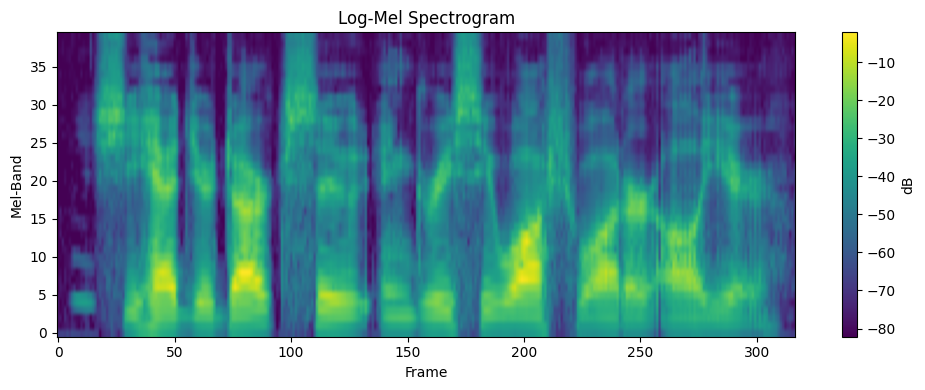

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Pfad zur gespeicherten Feature-Datei
feature_path = "TEST_CLEAN/features/00c91d71.npy"  # <– ändere zu deiner Datei

# Lade die Log-Mel Features
features = np.load(feature_path)  # Shape: [frames, n_mels], z. B. [300, 40]

# Transponieren für Darstellung (Mel-Bänder auf Y-Achse)
features_T = features.T  # [n_mels, frames]

# Plotten
plt.figure(figsize=(10, 4))
plt.imshow(features_T, origin='lower', aspect='auto', cmap='viridis')
plt.title("Log-Mel Spectrogram")
plt.xlabel("Frame")
plt.ylabel("Mel-Band")
plt.colorbar(label="dB")
plt.tight_layout()
plt.show()
